In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Specific growth rate calcs.xlsx to Specific growth rate calcs.xlsx


In [ ]:
import pandas as pd
data = pd.read_excel('Specific growth rate calcs.xlsx')
print(data.columns)

Index(['run_id', 'X0', 'Stirring speed', 'time', 'pH', 'DO',
       'glucose_concentration', 'lactate_concentration', 'mu_t', 'p_t'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd

# Load data from Excel
data = pd.read_excel('Specific growth rate calcs.xlsx')

# Assuming 'run_id' is a column that identifies each run
unique_runs = data['run_id'].unique()

# Initialize lists to store inputs and outputs for all runs
X_input_all = []
mu_t_all = []
p_t_all = []

for run in unique_runs:
    run_data = data[data['run_id'] == run]

    # Extract values for the current run
    X0 = run_data['X0'].values[0]
    pH = run_data['pH'].values[0]
    DO = run_data['DO'].values[0]
    Stir_speed = run_data['Stirring speed'].values[0]
    Gluc_conc = run_data['glucose_concentration'].values.reshape(-1,1)
    Lact_conc = run_data['lactate_concentration'].values.reshape(-1,1)

    # Prepare input for the current run
    time = run_data['time'].values.reshape(-1, 1)

    # Create constant arrays for the current run
    X0_array = np.full((time.shape[0], 1), X0)
    pH_array = np.full((time.shape[0], 1), pH)
    DO_array = np.full((time.shape[0], 1), DO)
    Stir_speed_array = np.full((time.shape[0], 1), Stir_speed)

    # Combine inputs for the current run (only X0, pH, DO)
    X_input_run = np.concatenate([X0_array, time, Gluc_conc, pH_array, DO_array, Stir_speed_array, Lact_conc], axis=1)
    X_input_all.append(X_input_run)

    # Append outputs for the current run
    mu_t_all.append(run_data['mu_t'].values.reshape(-1, 1))
    p_t_all.append(run_data['p_t'].values.reshape(-1, 1))

# Concatenate all runs into single arrays
X_input_all = np.vstack(X_input_all)
mu_t_all = np.vstack(mu_t_all)
p_t_all = np.vstack(p_t_all)

# Standardization: Calculate the median for each column and normalize
medians = np.median(X_input_all, axis=0)
X_input_normalized = X_input_all / medians

# Standardize the output variables as well
mu_t_normalized = mu_t_all / np.median(mu_t_all)
p_t_normalized = p_t_all / np.median(p_t_all)
output_data = np.concatenate([mu_t_normalized, p_t_normalized], axis=1)
input_shape = X_input_normalized.shape[1]
output_shape = output_data.shape[1]
# Prepare the input for the model
# Split the normalized input into state and external variables
#state_inputs = X_input_normalized[:, [0, 1]]  # X0, time
#external_inputs = X_input_normalized[:, [2,3]]  # pH, DO

#print(state_inputs)
#print(external_inputs)
print(X_input_normalized)
print(output_data)
print(output_shape)


[[4.88977775e-01 0.00000000e+00 9.69612262e-01 ... 1.38277512e+00
  9.73684211e-01 3.16318305e-02]
 [4.88977775e-01 1.42857143e-01 9.04048033e-01 ... 1.38277512e+00
  9.73684211e-01 2.38158291e-01]
 [4.88977775e-01 2.85714286e-01 7.63346183e-01 ... 1.38277512e+00
  9.73684211e-01 6.51764005e-01]
 ...
 [1.02021658e+00 1.71428571e+00 3.84842009e-05 ... 1.00000000e+00
  1.00000000e+00 1.18861003e-01]
 [1.02021658e+00 1.85714286e+00 1.36646688e-05 ... 1.00000000e+00
  1.00000000e+00 7.10142277e-02]
 [1.02021658e+00 2.00000000e+00 6.93888679e-06 ... 1.00000000e+00
  1.00000000e+00 5.06541525e-02]]
[[ 0.00000000e+00  0.00000000e+00]
 [ 8.65446792e+00  6.18702636e-01]
 [ 7.31210260e+00  9.86674227e-01]
 [ 3.91878580e+00  9.18450615e-01]
 [ 5.05665542e+00  1.55845405e+00]
 [ 3.99673895e+00  1.79969742e+00]
 [ 3.05419350e+00  1.84150620e+00]
 [ 1.68410600e+00  1.32658208e+00]
 [ 1.28848867e+00  1.18596627e+00]
 [ 9.94929613e-01  1.11733412e+00]
 [ 7.72012192e-01  1.07731533e+00]
 [ 5.40809763e-

In [ ]:
from keras import backend as K
from keras import activations
from keras import layers
from keras import models
from keras import initializers

# Set initializer limits as specified
initializer = initializers.RandomUniform(minval=-0.9, maxval=0.9)

# Define the Sequential model with the specified layers
model = models.Sequential([
    layers.Dense(16, activation=activations.relu, input_shape=(input_shape,), kernel_initializer=initializer),
    layers.Dense(32, activation=activations.relu, kernel_initializer=initializer),
    layers.Dense(16, activation=activations.relu, kernel_initializer=initializer),
    layers.Dense(2, kernel_initializer=initializer)  # Output layer, no activation function
])

# Print a summary of the model to confirm the layer setup
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,234 (4.82 KB)

 Trainable params: 1,234 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [8]:
import numpy as np
from keras import callbacks

# Early stopping callback
es = callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    patience=80,
    restore_best_weights=True,
    verbose=1
)

# Add a checkpoint where loss is minimum, and save that model
mc = callbacks.ModelCheckpoint('best_model.keras', monitor='loss',
                                mode='min', verbose=1, save_best_only=True)

# Fit the model with the callbacks
historyData = model.fit(X_input_normalized, output_data, epochs=800, callbacks=[es, mc])

# Accessing the loss history
loss_hist = historyData.history['loss']

# Find the best epoch and smallest loss
best_epoch = np.argmin(historyData.history['loss']) + 1
print('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

# Make predictions
predictions = model.predict(X_input_normalized)

Epoch 1/800
 1/10 ━━━━━━━━━━━━━━━━━━━━ 8s 968ms/step - loss: 0.3416
Epoch 1: loss improved from inf to 0.30805, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2962  
Epoch 2/800
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1801
Epoch 2: loss improved from 0.30805 to 0.25905, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2238  
Epoch 3/800
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1450
Epoch 3: loss improved from 0.25905 to 0.24392, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2047 
Epoch 4/800
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1760
Epoch 4: loss improved from 0.24392 to 0.24019, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2240 
Epoch 5/800
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1661
Epoch 5: loss improved from 0.24019 to 0.23392, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

RMS Deviation: 0.5256132512667652


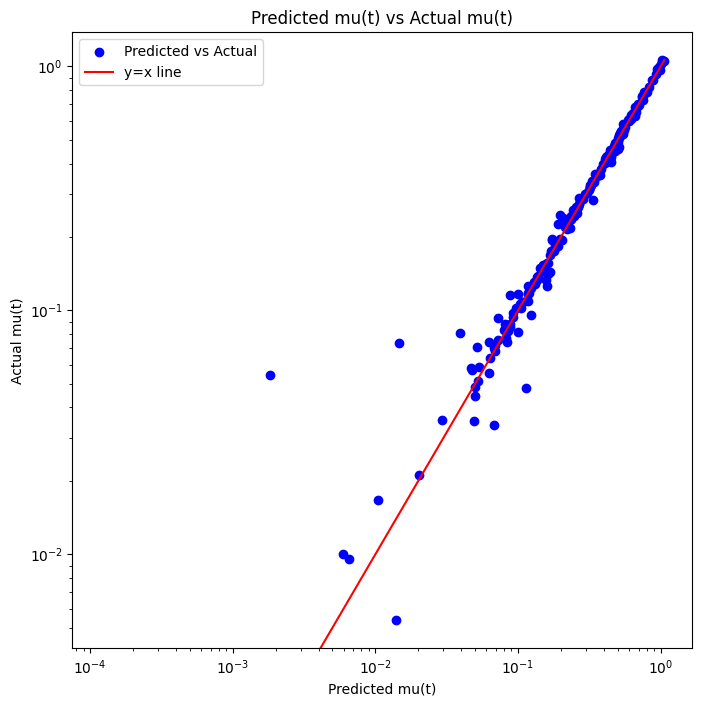

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
median = np.median(mu_t_all)
# Inverse normalization
predicted_mu_t = predictions[:,0] * median
# Calculate RMS deviation
sumsqrs = np.mean((predicted_mu_t - mu_t_all) ** 2)
rms_deviation = np.sqrt(sumsqrs)
print("RMS Deviation:", rms_deviation)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(predicted_mu_t, mu_t_all, label='Predicted vs Actual', color='blue')
plt.title('Predicted mu(t) vs Actual mu(t)')
plt.xlabel('Predicted mu(t)')
plt.ylabel('Actual mu(t)')
plt.loglog()

# Generate red y=x line
x_data = np.linspace(0, max(max(predicted_mu_t), max(mu_t_all)), num=100)
y_data = x_data
plt.plot(x_data, y_data, color='red', label='y=x line')
plt.legend()
plt.show()

RMS Deviation: 45.17447184908669


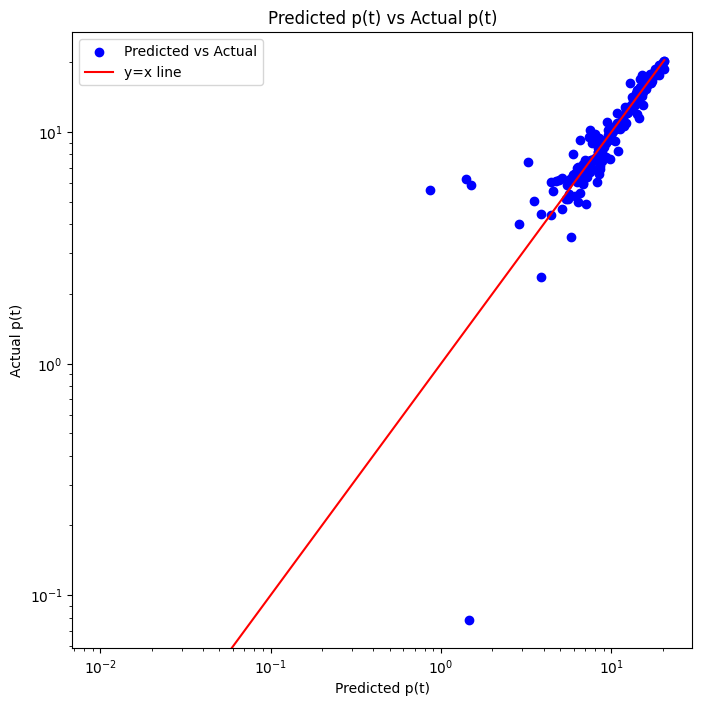

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
median_p = np.median(p_t_all)
# Inverse normalization
predicted_p_t = predictions[:,1] * median_p
# Calculate RMS deviation
sumsqrs = np.mean((predicted_p_t - p_t_all) ** 2)
rms_deviation = np.sqrt(sumsqrs)
print("RMS Deviation:", rms_deviation)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(predicted_p_t, p_t_all, label='Predicted vs Actual', color='blue')
plt.title('Predicted p(t) vs Actual p(t)')
plt.xlabel('Predicted p(t)')
plt.ylabel('Actual p(t)')
plt.loglog()

# Generate red y=x line
x_data = np.linspace(0, max(max(predicted_p_t), max(p_t_all)), num=100)
y_data = x_data
plt.plot(x_data, y_data, color='red', label='y=x line')
plt.legend()
plt.show()

300
300
300


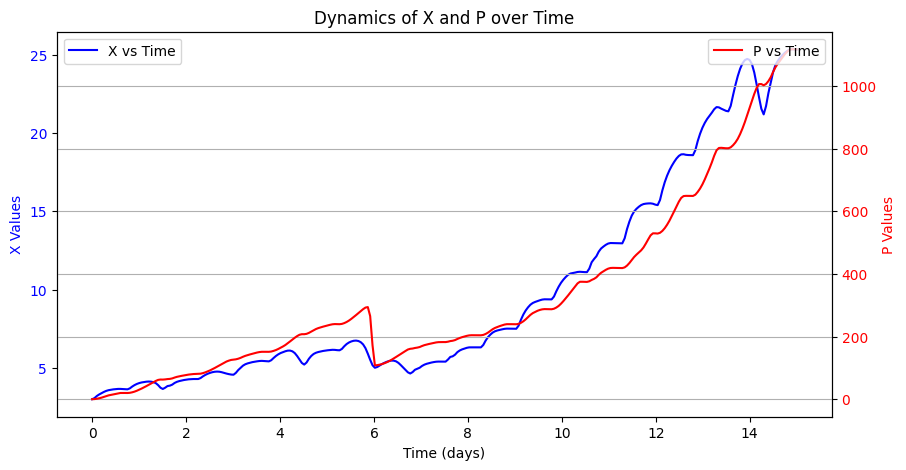

In [11]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

print(len(predicted_mu_t))
print(len(predicted_p_t))

# Define the ODE system
def model_ode(y, t, predicted_mu_t, predicted_p_t, time_points):
    X, P = y
    # Interpolate mu and p for the current time t
    mu = np.interp(t, time_points, predicted_mu_t)
    p = np.interp(t, time_points, predicted_p_t)
    #D = 4.8 #day-1

    # Example equations (replace with your actual model equations)
    dXdt = mu * X # Growth rate of X
    dPdt = p * X # Growth rate of P
    return [dXdt, dPdt]

# Initial conditions
initial_conditions = [3, 0]  # Ensure these are set correctly

# Time points to solve the ODE
time_points = np.linspace(0, 15, 300)  # From 0 to 10 seconds
print(len(time_points))
# Solve the ODE using the predicted values
solution = odeint(model_ode, initial_conditions, time_points, args=(predicted_mu_t.flatten(), predicted_p_t.flatten(), time_points))

# Extract results
X_result = solution[:, 0]
P_result = solution[:, 1]

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot X on the primary y-axis
ax1.plot(time_points, X_result, label='X vs Time', color='b')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('X Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for P
ax2 = ax1.twinx()
ax2.plot(time_points, P_result, label='P vs Time', color='r')
ax2.set_ylabel('P Values', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Dynamics of X and P over Time')
plt.grid()
plt.show()

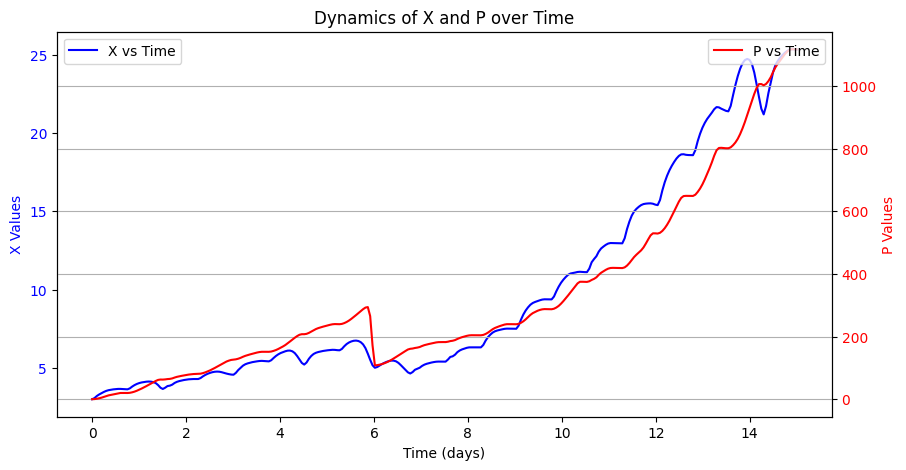

In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system
def model_ode(y, t, mu_t_all, p_t_all, time_points):
    X, P = y
    # Interpolate mu and p for the current time t
    mu = np.interp(t, time_points, mu_t_all)
    p = np.interp(t, time_points, p_t_all)

    # Example equations (replace with your actual model equations)
    dXdt = mu * X  # Growth rate of X
    dPdt = p * X   # Growth rate of P
    return [dXdt, dPdt]

# Initial conditions
initial_conditions = [3, 0]  # Ensure these are set correctly

# Time points to solve the ODE
time_points = np.linspace(0, 15, 300)  # From 0 to 15 days

# Solve the ODE using the predicted values
solution = odeint(model_ode, initial_conditions, time_points, args=(predicted_mu_t.flatten(), predicted_p_t.flatten(), time_points))

# Extract results
X_result = solution[:, 0]
P_result = solution[:, 1]

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot X on the primary y-axis
ax1.plot(time_points, X_result, label='X vs Time', color='b')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('X Values', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for P
ax2 = ax1.twinx()
ax2.plot(time_points, P_result, label='P vs Time', color='r')
ax2.set_ylabel('P Values', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Dynamics of X and P over Time')
plt.grid()
plt.show()